In [2]:
from keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x_train.shape
#has no color channel

(60000, 28, 28)

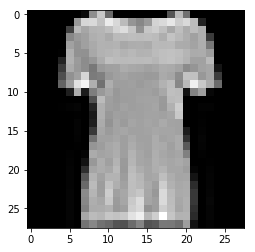

In [6]:
#grab single image
single = x_train[10]
plt.imshow(single, cmap='gray')

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
y_cat_test = to_categorical(y_test,10) #no of class = 10
y_cat_train = to_categorical(y_train,10)

In [10]:
y_cat_test[0] #one hot encoded

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [11]:
single.max() #still very high we have to normalize

255

In [12]:
#manually
x_train = x_train/x_train.max()

In [13]:
#manually
x_test = x_test/x_test.max()

In [14]:
x_test[0].max()

1.0

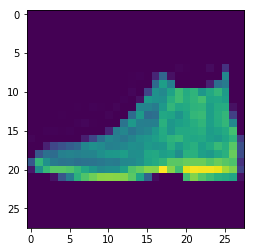

In [15]:
plt.imshow(x_test[0])

In [16]:
x_test.shape, x_train.shape

((10000, 28, 28), (60000, 28, 28))

In [17]:
#include color channel now it has only 1
x_train = x_train.reshape(60000,28,28,1)

In [18]:
x_train.shape

(60000, 28, 28, 1)

In [19]:
x_test = x_test.reshape(10000,28,28,1)

In [20]:
x_test.shape

(10000, 28, 28, 1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D,Flatten 

In [22]:
model = Sequential()
#CONV Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#above 2 layers can understand 2d array
#but dense layer only knows 1d so we need to flatten out
model.add(Flatten())
#dense
model.add(Dense(128,activation='relu')) #no of neurons can choose any 128,64,256 etc
model.add(Dense(10,activation='softmax')) #no of o/p
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, y_cat_train, nb_epoch=2, validation_split=0.2, shuffle=True)

Instructions for updating:
Use tf.cast instead.


C:\Users\codehax41\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 64s 1ms/step - loss: 0.4105 - acc: 0.8542 - val_loss: 0.3183 - val_acc: 0.8875
Epoch 2/2
48000/48000 [==============================] - 58s 1ms/step - loss: 0.2828 - acc: 0.8990 - val_loss: 0.2950 - val_acc: 0.8942


In [24]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 3s 275us/step


[0.31422339930534365, 0.8901]

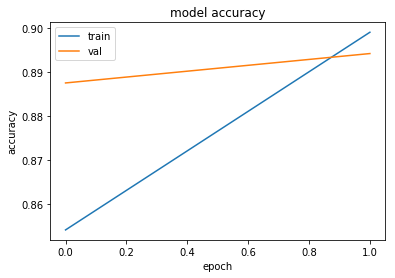

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import classification_report

In [29]:
predictions = model.predict_classes(x_test)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.80      0.86      0.83      1000
           3       0.92      0.87      0.89      1000
           4       0.74      0.92      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.75      0.62      0.68      1000
           7       0.92      0.98      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.94      0.96      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

